# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

In [2]:
A, b = main.diag_dominant_matrix_A_b(5)
print(A,b)

[[378   6   0   3   3]
 [  8  98   3   4   3]
 [  1   5  59   1   5]
 [  8   2   1 309   8]
 [  0   6   6   2 289]] [1 8 1 0 5]


***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

In [3]:
A, b = main.symmetric_matrix_A_b(5)
print(A,b)

[[1 1 0 8 2]
 [1 3 1 1 0]
 [0 1 5 5 8]
 [8 1 5 1 4]
 [2 0 8 4 7]] [3 0 7 2 5]


***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [4]:
A1, b1 = main.random_matrix_Ab(10,9)
A2, b2 = main.diag_dominant_matrix_A_b(10)
A3, b3 = main.symmetric_matrix_A_b(10)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Ponieważ funkcja "solve" z biblioteki numpy działa dla każdego układu równań liniowych z macierzą kwadratową, nie muszę dodatkowo sprawdzać pewnych założeń o A. Funkcja ta również nie działa na zasadzie metody iteracyjnej dlatego poniżej podano jedynie normę residuum rozwiązania oraz czas niezbędny do wyznaczenia rozwiązania.

***Funkcja 'solve' z biblioteki numpy:***   

In [5]:
x1 = np.linalg.solve(A1,b1)
norm = main.residual_norm(A1,x1,b1)
print('Norma residuum rozwiązania: ',norm)
print('Czas niezbędny na rozwiązanie:')
time = %timeit -o np.linalg.solve(A1,b1)

Norma residuum rozwiązania:  4.475855276957538e-13
Czas niezbędny na rozwiązanie:
The slowest run took 4.91 times longer than the fastest. This could mean that an intermediate result is being cached.
157 µs ± 117 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


***Iteracyjna metoda Jacobiego:***

In [6]:
if not main.is_diag_dominant(A1):
    print('Macierz nie jest diagonalnie dominująca, a więc nie spełnia WK do rozwiązania układu równań metodą Jacobiego.')
else:
    print('Można rozwiązać układ przy użyciu iteracyjnej metody Jacobiego')

Macierz nie jest diagonalnie dominująca, a więc nie spełnia WK do rozwiązania układu równań metodą Jacobiego.


***Iteracyjna metoda gradientów sprzężonych:***

In [7]:
if (not main.is_symmetric(A1)) or (not np.all(np.linalg.eigvals(A1) > 0)):
    print('Macierz nie jest symetryczna albo nie jest dodatnio określona, a więc nie spłnia WK do rozwiązania ukłądu ' +
          'równań metodą gradientów sprzężonych.')
else:
    print('Można rozwiązać układ przy użyciu iteracyjnej metody gradientów sprzężonych')

Macierz nie jest symetryczna albo nie jest dodatnio określona, a więc nie spłnia WK do rozwiązania ukłądu równań metodą gradientów sprzężonych.


***Iteracyjna metoda GMRS:***

In [8]:
%%capture
norm = []
it_list = []
it_lvl = 0
def callback_fnc(xk):
    global norm
    global it_lvl
    global it_list
    it_lvl = it_lvl + 1
    it_list.append(it_lvl)
    norm.append(xk)

x1, info = sp.sparse.linalg.gmres(A1, b1, maxiter=20, atol = 1e-16, callback = callback_fnc, callback_type = 'pr_norm')

time = []
error = []
for it_lvl in range(max(it_list)):
    t = %timeit -o -r 10 -n 1000 sp.sparse.linalg.gmres(A1, b1, maxiter=it_lvl, atol = 1e-16)
    time.append(t.average)
    error.append(t.stdev)

Operacje przebiegły pomyślnie


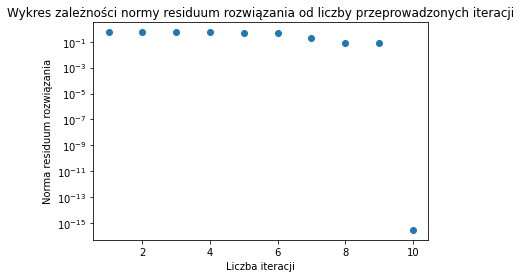

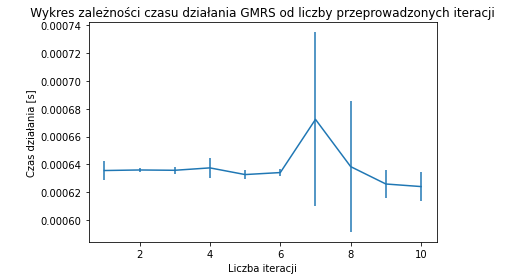

In [9]:
if info == 0:
    print('Operacje przebiegły pomyślnie')
else:
    print('Błąd podczas działania funkcji GMRS')
plt.scatter(it_list,norm)
plt.yscale('log')
plt.title('Wykres zależności normy residuum rozwiązania od liczby przeprowadzonych iteracji')
plt.xlabel('Liczba iteracji')
plt.ylabel('Norma residuum rozwiązania')
plt.show()

plt.errorbar(it_list, time, yerr = error)
plt.title('      Wykres zależności czasu działania GMRS od liczby przeprowadzonych iteracji      ')
plt.xlabel('Liczba iteracji')
plt.ylabel('Czas działania [s]')
plt.tight_layout()
plt.show()

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

***Funkcja 'solve' z biblioteki numpy:***

In [10]:
x2 = np.linalg.solve(A2,b2)
norm = main.residual_norm(A2,x2,b2)
print('Norma residuum rozwiązania: ',norm)
print('Czas niezbędny na rozwiązanie:')
time = %timeit -o np.linalg.solve(A2,b2)

Norma residuum rozwiązania:  2.3077221414675522e-15
Czas niezbędny na rozwiązanie:
319 µs ± 27.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


***Iteracyjna metoda Jacobiego:***

In [11]:
if not main.is_diag_dominant(A2):
    print('Macierz nie jest diagonalnie dominująca, a więc nie spełnia WK do rozwiązania układu równań metodą Jacobiego.')
else:
    print('Można rozwiązać układ przy użyciu iteracyjnej metody Jacobiego')

Można rozwiązać układ przy użyciu iteracyjnej metody Jacobiego


In [12]:
%%capture
norm = []
time = []
error = []
it_list = []
x_init = np.zeros((10))
for it_lvl in range(1,21):
    x2, it = main.solve_jacobi(A2,b2,x_init,maxiter = it_lvl, epsilon = 1e-16)
    t = %timeit -o -r 10 -n 500 main.solve_jacobi(A2,b2,x_init,maxiter = it_lvl, epsilon = 1e-16)
    norm.append(main.residual_norm(A2,x2,b2))
    time.append(t.average)
    error.append(t.stdev)
    it_list.append(it_lvl)

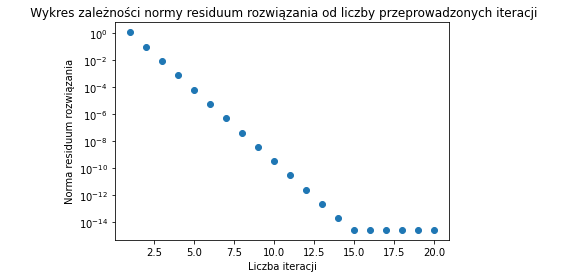

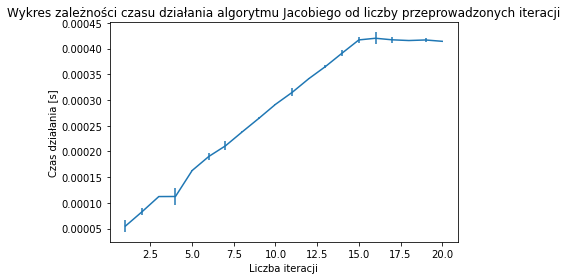

In [13]:
plt.scatter(it_list,norm)
plt.yscale('log')
plt.title('      Wykres zależności normy residuum rozwiązania od liczby przeprowadzonych iteracji     ')
plt.xlabel('Liczba iteracji')
plt.ylabel('Norma residuum rozwiązania')
plt.show()

plt.errorbar(it_list, time, yerr = error)
plt.title('Wykres zależności czasu działania algorytmu Jacobiego od liczby przeprowadzonych iteracji')
plt.xlabel('Liczba iteracji')
plt.ylabel('Czas działania [s]')
plt.tight_layout()
plt.show()

***Iteracyjna metoda gradientów sprzężonych:***

In [14]:
if (not main.is_symmetric(A2)) or (not np.all(np.linalg.eigvals(A2) > 0)):
    print('Macierz nie jest symetryczna albo nie jest dodatnio określona, a więc nie spłnia WK do rozwiązania układu ' +
          'równań metodą gradientów sprzężonych.')
else:
    print('Można rozwiązać układ przy użyciu iteracyjnej metody gradientów sprzężonych')

Macierz nie jest symetryczna albo nie jest dodatnio określona, a więc nie spłnia WK do rozwiązania układu równań metodą gradientów sprzężonych.


***Iteracyjna metoda GMRS:***

In [15]:
%%capture
norm = []
it_list = []
it_lvl = 0
def callback_fnc(xk):
    global norm
    global it_lvl
    global it_list
    it_lvl = it_lvl + 1
    it_list.append(it_lvl)
    norm.append(xk)

x2, info = sp.sparse.linalg.gmres(A2, b2, maxiter=20, atol = 1e-16, callback = callback_fnc, callback_type = 'pr_norm')

time = []
error = []
for it_lvl in range(max(it_list)):
    t = %timeit -o -r 10 -n 1000 sp.sparse.linalg.gmres(A2, b2, maxiter=it_lvl, atol = 1e-16)
    time.append(t.average)
    error.append(t.stdev)

Operacje przebiegły pomyślnie


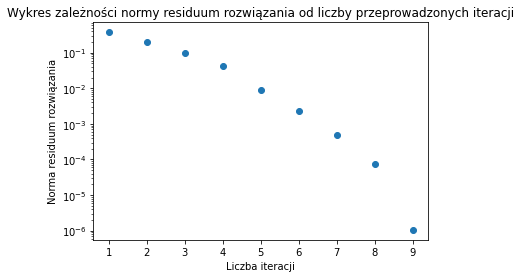

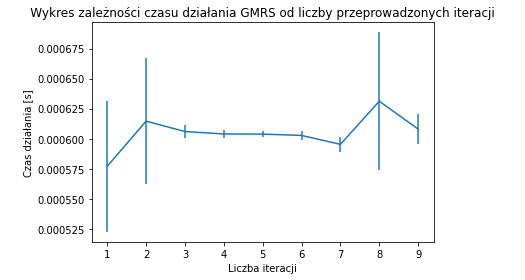

In [16]:
if info == 0:
    print('Operacje przebiegły pomyślnie')
else:
    print('Błąd podczas działania funkcji GMRS')
plt.scatter(it_list,norm)
plt.yscale('log')
plt.title('Wykres zależności normy residuum rozwiązania od liczby przeprowadzonych iteracji')
plt.xlabel('Liczba iteracji')
plt.ylabel('Norma residuum rozwiązania')
plt.show()

plt.errorbar(it_list, time, yerr = error)
plt.title('      Wykres zależności czasu działania GMRS od liczby przeprowadzonych iteracji      ')
plt.xlabel('Liczba iteracji')
plt.ylabel('Czas działania [s]')
plt.tight_layout()
plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

***Funkcja 'solve' z biblioteki numpy:***

In [17]:
x3 = np.linalg.solve(A3,b3)
norm = main.residual_norm(A3,x3,b3)
print('Norma residuum rozwiązania: ',norm)
print('Czas niezbędny na rozwiązanie:')
time = %timeit -o np.linalg.solve(A3,b3)

Norma residuum rozwiązania:  8.51910812704787e-15
Czas niezbędny na rozwiązanie:
325 µs ± 44.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


***Iteracyjna metoda Jacobiego:***

In [18]:
if not main.is_diag_dominant(A3):
    print('Macierz nie jest diagonalnie dominująca, a więc nie spełnia WK do rozwiązania układu równań metodą Jacobiego.')
else:
    print('Można rozwiązać układ przy użyciu iteracyjnej metody Jacobiego')

Macierz nie jest diagonalnie dominująca, a więc nie spełnia WK do rozwiązania układu równań metodą Jacobiego.


***Iteracyjna metoda gradientów sprzężonych:***

In [19]:
if (not main.is_symmetric(A3)) or (not np.all(np.linalg.eigvals(A3) > 0)):
    print('Macierz nie jest symetryczna albo nie jest dodatnio określona, a więc nie spłnia WK do rozwiązania układu ' +
          'równań metodą gradientów sprzężonych.')
else:
    print('Można rozwiązać układ przy użyciu iteracyjnej metody gradientów sprzężonych')

Macierz nie jest symetryczna albo nie jest dodatnio określona, a więc nie spłnia WK do rozwiązania układu równań metodą gradientów sprzężonych.


Teoretycznie nie powinno być możliwe zastosowanie metody gradientów sprzężonych w tym przypadku z uwagi na brak dodatniej określoności macierzy A, jednak funkcja z biblioteki Scipy traktuje macierz jako operator liniowy, zwracając informację o pozytywnym przebiegu algorytmu, dlatego właśnie przedstawiam poniżej zastosowanie tej funkcji wraz z charakterystyką dokładności oraz charakterystyką czasową.

In [20]:
%%capture
norm = []
it_list = []
it_lvl = 0
def callback_fnc(xk):
    global norm
    global it_lvl
    global it_list
    it_lvl = it_lvl + 1
    it_list.append(it_lvl)
    norm.append(main.residual_norm(A3,xk,b3))

x3, info = sp.sparse.linalg.cg(A3, b3, maxiter=20, atol = 1e-16, callback = callback_fnc)

time = []
error = []
for it_lvl in range(max(it_list)):
    t = %timeit -o -r 10 -n 1000 sp.sparse.linalg.cg(A3, b3, maxiter=it_lvl, atol = 1e-16)
    time.append(t.average)
    error.append(t.stdev)

Operacje przebiegły pomyślnie


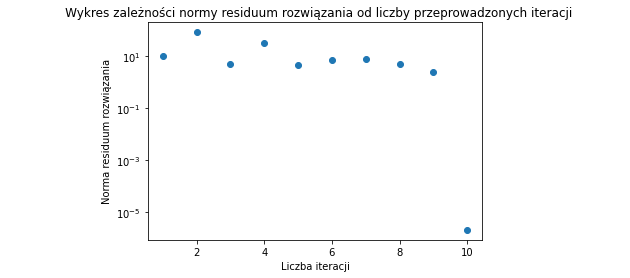

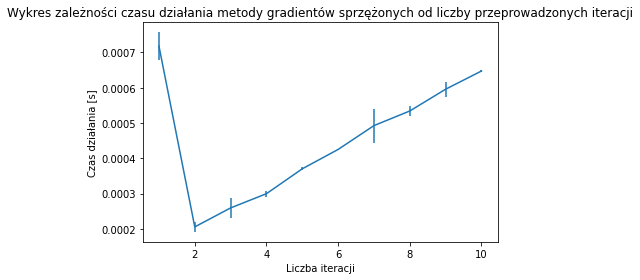

In [21]:
if info == 0:
    print('Operacje przebiegły pomyślnie')
else:
    print('Błąd podczas działania funkcji GMRS')
plt.scatter(it_list,norm)
plt.yscale('log')
plt.title('               Wykres zależności normy residuum rozwiązania od liczby przeprowadzonych iteracji             ')
plt.xlabel('Liczba iteracji')
plt.ylabel('Norma residuum rozwiązania')
plt.show()

plt.errorbar(it_list, time, yerr = error)
plt.title('Wykres zależności czasu działania metody gradientów sprzężonych od liczby przeprowadzonych iteracji')
plt.xlabel('Liczba iteracji')
plt.ylabel('Czas działania [s]')
plt.tight_layout()
plt.show()

***Iteracyjna metoda GMRS:***

In [22]:
%%capture
norm = []
it_list = []
it_lvl = 0
def callback_fnc(xk):
    global norm
    global it_lvl
    global it_list
    it_lvl = it_lvl + 1
    it_list.append(it_lvl)
    norm.append(xk)

x3, info = sp.sparse.linalg.gmres(A3, b3, maxiter=20, atol = 1e-16, callback = callback_fnc, callback_type = 'pr_norm')

time = []
error = []
for it_lvl in range(max(it_list)):
    t = %timeit -o -r 10 -n 1000 sp.sparse.linalg.gmres(A3, b3, maxiter=it_lvl, atol = 1e-16)
    time.append(t.average)
    error.append(t.stdev)

Operacje przebiegły pomyślnie


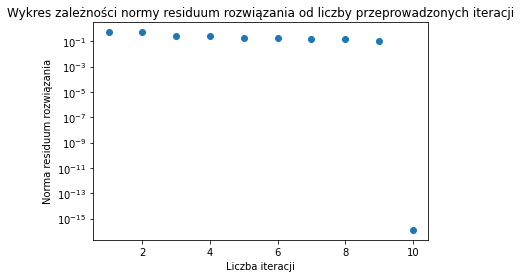

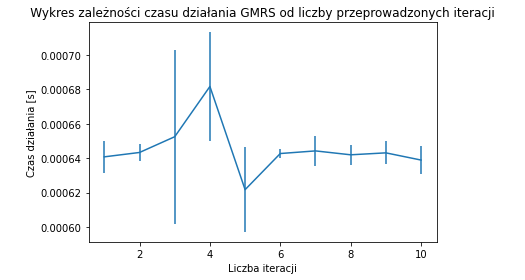

In [23]:
if info == 0:
    print('Operacje przebiegły pomyślnie')
else:
    print('Błąd podczas działania funkcji GMRS')
plt.scatter(it_list,norm)
plt.yscale('log')
plt.title('Wykres zależności normy residuum rozwiązania od liczby przeprowadzonych iteracji')
plt.xlabel('Liczba iteracji')
plt.ylabel('Norma residuum rozwiązania')
plt.show()

plt.errorbar(it_list, time, yerr = error)
plt.title('      Wykres zależności czasu działania GMRS od liczby przeprowadzonych iteracji      ')
plt.xlabel('Liczba iteracji')
plt.ylabel('Czas działania [s]')
plt.tight_layout()
plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)